# Use AutoEncoding with force_torque_sensor weight initialize
--------------------------------------------------------------------

Datasets paper: https://arxiv.org/pdf/1807.06749.pdf

Download: https://ibm.ent.box.com/s/vw4y576xlz6ujblpl3gz9c5ttu51qc18



In [1]:
import numpy as np 

sides_3 = np.load('../data/force_torque_sensor/Dataset/3_sides/Data/data.npy')
# sides_4 = np.load('../data/force_torque_sensor/Dataset/4_sides/Data/data.npy')
# sides_5 = np.load('../data/force_torque_sensor/Dataset/5_sides/Data/data.npy')
# sides_6 = np.load('../data/force_torque_sensor/Dataset/6_sides/Data/data.npy')
# sides_200 = np.load('../data/force_torque_sensor/Dataset/200_sides/Data/data.npy')


import numpy as np 
from collections import namedtuple
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# import plotly.plotly as py
# import plotly

import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler



from models import AE

import numpy as np


In [2]:
names = {
    0:"Force x",
    1:"Force y",
    2:"Force z",
    3:"Moment x",
    4:"Moment y",
    5:"Moment z",
    6:"Peg Position x",
    7:"Peg Position y",
    8:"Peg Position z",
    9:"Angle",
    10:"Time",
    11:"Counter",
}

# data = []
# sides=sides_200

# for i in range(len(sides[0])):
#     k=0
#     samples=[]
    
#     for j in range(15853):
#         samples.append(sides[k][i])
#         k+=100
        
#     trace0 = go.Scatter(
#         x=np.linspace(0, len(samples)-1, num=len(samples), endpoint=True),
#         y=samples,
#         mode='lines+markers',
#         name=names[i],
#         hoverinfo='name',
        
#         marker=dict(
#                 size=3.5,
#         ),
#         line=dict(
#             shape='linear',
# #             color=colors[i],
#              width=0.4,
#         )
#     )
#     data.append(trace0)

# layout = dict(
#     legend=dict(
#         y=0.5,
#         traceorder='reversed',
#         font=dict(
#             size=16
#         )
#     )
# )

# fig = go.Figure(data=data, layout=layout)


# fig = dict(data=data, layout=layout)
# plotly.offline.init_notebook_mode()
# plotly.offline.iplot(fig)


# # py.iplot(fig, filename='force_torque_dataset_sides_200_all')

## Plot the original signals

1585353


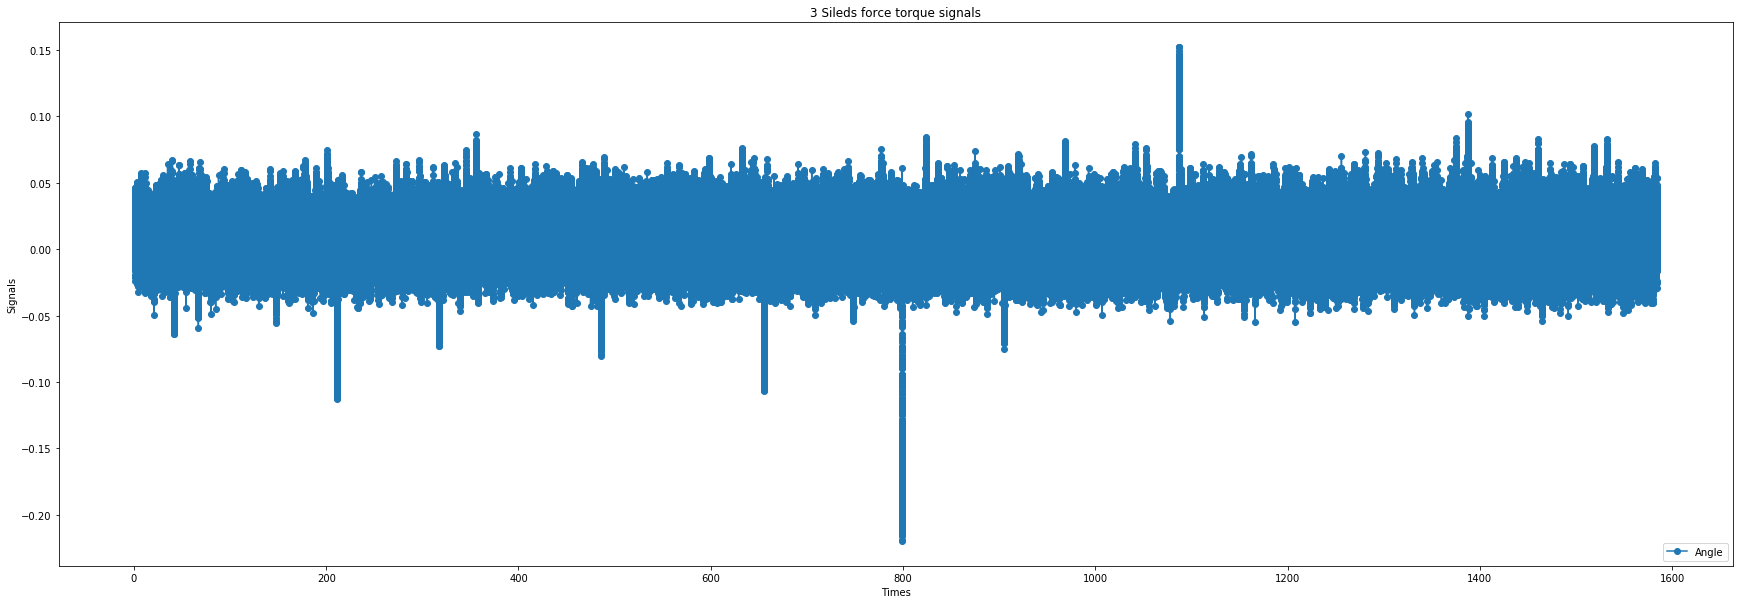

In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

cmap=plt.cm.get_cmap(plt.cm.viridis,143)


# plt.rcParams['font.size'] = 11.
# plt.rcParams['font.family'] = 'Comic Sans MS'
# plt.rcParams['axes.labelsize'] = 15.
# plt.rcParams['xtick.labelsize'] = 10.
# plt.rcParams['ytick.labelsize'] = 10.

plt.figure(figsize=(30,10))



sides = sides_3
print(len(sides))

Force_x = sides[:,0] 
Force_y = sides[:,1]
Force_z = sides[:,2]
Moment_x = sides[:,3]
Moment_y = sides[:,4]
Moment_z = sides[:,5]
Peg_Position_x = sides[:,6]
Peg_Position_y = sides[:,7]
Peg_Position_z = sides[:,8]
Angle = sides[:,9]
Time = sides[:,10]
Counter = sides[:,11]


# plt.plot(Time, Force_x, marker='s', linestyle='-', markersize=2, linewidth=1, label='Force_x')
# plt.plot(Time, Force_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_y')
# plt.plot(Time, Force_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_z')

# plt.plot(Time, Moment_x, marker='o, linestyle='-', label='Moment_x')
# plt.plot(Time, Moment_y, marker='o, linestyle='-', label='Moment_y')
# plt.plot(Time, Moment_z, marker='o, linestyle='-', label='Moment_z')

# plt.plot(Time, Peg_Position_x, marker='o', linestyle='-', label='Peg_Position_x')
# plt.plot(Time, Peg_Position_y, marker='o', linestyle='-', label='Peg_Position_y')
# plt.plot(Time, Peg_Position_z, marker='o', linestyle='-', label='Peg_Position_z')

plt.plot(Time, Angle, marker='o', linestyle='-', label='Angle')
# plt.plot(Time, Counter, marker='o', linestyle='-', label='Counter')


plt.xlabel('Times')
plt.ylabel('Signals')
plt.title('3 Sileds force torque signals')
plt.legend(loc='lower right')
plt.show()


In [4]:
print (len(sides_3))
print (len(sides_3[0]))


1585353
12


In [5]:
# sides_3 = sides_3[:,0:10]


## Normalize

In [5]:
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

def un_normalize(normalized_data, input_data):
    mu = np.mean(input_data,axis=0)
    std = np.std(input_data,axis=0)
    return normalized_data*std+mu
    

# sides_3 = feature_normalize(sides_3)

In [6]:
# for i in range(len(sides_3[1000])):
#     if i <= 9:
#         sides_3[:,i] = feature_normalize(sides_3[:,i])
#     else:
#         sides_3[:,i] = sides_3[:,i]
        

    
train_data = feature_normalize(sides_3)
test_data =feature_normalize(sides_3)

print(train_data.max(axis=0))
print(train_data.min(axis=0))

[ 1.61041529  1.60420085  6.98694537  1.58397099  5.45851616 14.18979856
  2.0463434   5.16795321  7.59738043  8.87094703  1.73094382  1.73206426]
[ -1.60663406  -1.57587557  -6.30031166  -1.58428425  -6.6635873
  -5.66195959  -1.29488537 -20.90977217 -10.88038382 -14.44267477
  -1.73095014  -1.73208833]


In [17]:
# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 16
# percentage of training set to use as validation
valid_size = 0.2

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [18]:

import torch.utils.data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,
                                           sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,
                                           sampler=valid_sampler)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)
print (len(train_loader))

79268


In [19]:
latent_size = 2

ae = AE(latent_size=latent_size).float()

optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

logs = defaultdict(list)
print(ae)

use_cuda = torch.cuda.is_available
if use_cuda:
    ae.cuda()

AE(
  (encoder): Encoder(
    (fc1): Linear(in_features=12, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=8, bias=True)
    (fc3): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (fc4): Linear(in_features=2, out_features=8, bias=True)
    (fc5): Linear(in_features=8, out_features=32, bias=True)
    (fc6): Linear(in_features=32, out_features=12, bias=True)
  )
)


In [20]:
# specify loss function
def loss_fn(recon_x, x):
    criterion = nn.MSELoss()
#     criterion = nn.CrossEntropyLoss()
#     x = x.long()
    loss = criterion(recon_x, x)
    return loss

In [21]:
epochs = 20
print_every = 100


for epoch in range(epochs):
    
    for iteration, d in enumerate(train_loader):
        if use_cuda:
            input_data = d.cuda().float()
        else:
            input_data = d.float()
        optimizer.zero_grad()
        recon_data = ae(input_data)
        loss = loss_fn(recon_data, input_data)
        loss.backward()
        optimizer.step()

        logs['loss'].append(loss.item())

        if iteration % print_every == 0 or iteration == len(train_loader)-1:
            correct = 0
            total = 0
            for valid in valid_loader:
                if use_cuda:
                    input_valid = valid.cuda().float()
                else:
                    input_valid = valid.float()

                output_valid = ae(input_valid)
                valid_loss = loss_fn(output_valid, input_valid)

                total +=1

                if valid_loss < 0.5:
                    correct += 1

            valid_acc = correct / total  
            
            print("Epoch {:02d}/{:02d} Batch {:04d}/{:d}, Train_loss {:9.4f}, Valid_accuary{:9.4f}".format(
                epoch, epochs, iteration, len(train_loader)-1, loss.item(), valid_acc))

    torch.save(ae, 'ae.pkl')  
        
    if loss < 0.01:
        break

            
# correct = 0
# total = 0
# for valid in valid_loader:
#     if use_cuda:
#         input_valid = valid.cuda().float()
#     else:
#         input_valid = valid.float()
        
#     output_valid = ae(input_valid)
#     valid_loss = loss_fn(output_valid, input_valid)
    
#     total +=1
    
#     if valid_loss < 0.02:
#         correct += 1
        
# valid_acc = correct / total  
    
    

Epoch 00/20 Batch 0000/79267, Train_loss    0.7654, Valid_accuary   0.0000
Epoch 00/20 Batch 0100/79267, Train_loss    1.1698, Valid_accuary   0.0000
Epoch 00/20 Batch 0200/79267, Train_loss    0.6905, Valid_accuary   0.0000
Epoch 00/20 Batch 0300/79267, Train_loss    1.0072, Valid_accuary   0.0000
Epoch 00/20 Batch 0400/79267, Train_loss    0.7983, Valid_accuary   0.0000
Epoch 00/20 Batch 0500/79267, Train_loss    0.8667, Valid_accuary   0.0000
Epoch 00/20 Batch 0600/79267, Train_loss    0.7314, Valid_accuary   0.0000
Epoch 00/20 Batch 0700/79267, Train_loss    0.7176, Valid_accuary   0.0000
Epoch 00/20 Batch 0800/79267, Train_loss    1.0477, Valid_accuary   0.0000
Epoch 00/20 Batch 0900/79267, Train_loss    0.8583, Valid_accuary   0.0000
Epoch 00/20 Batch 1000/79267, Train_loss    0.9751, Valid_accuary   0.0000
Epoch 00/20 Batch 1100/79267, Train_loss    0.9469, Valid_accuary   0.0000
Epoch 00/20 Batch 1200/79267, Train_loss    0.8525, Valid_accuary   0.0000
Epoch 00/20 Batch 1300/79

KeyboardInterrupt: 

In [18]:
params = list(ae.named_parameters())
print(params)

[('encoder.fc1.weight', Parameter containing:
tensor([[ 8.6174e-03, -1.0068e-01, -4.2744e-02,  1.9617e-01,  3.3556e-02,
         -1.3730e-02,  3.6199e-02, -1.1249e-02, -8.2660e-03,  1.7836e-02,
          2.5727e-01,  1.5501e-02],
        [-1.5026e-03,  3.9488e-02,  6.2611e-05,  1.3502e-01, -2.2794e-02,
         -5.3521e-03, -2.3264e-01,  5.6521e-01,  2.1472e-01, -6.8965e-02,
         -1.8610e-01,  1.8613e-01],
        [ 9.7095e-02,  4.7430e-01, -1.1564e-01, -1.8099e-01,  2.9765e-02,
          2.5543e-02,  5.6717e-02,  4.7020e-02,  4.8671e-02,  6.5481e-01,
          4.7808e-02,  2.7983e-01],
        [ 8.7879e-02, -3.7234e-03,  8.1130e-01,  6.4384e-02, -1.3219e-01,
          2.6435e-02, -4.1147e-01, -7.3628e-02, -4.0421e-02,  2.9390e-02,
         -2.8016e-01, -1.1634e-01],
        [-2.0416e-02, -3.4511e-02,  2.0690e-02,  2.0821e-01, -1.5113e-03,
         -7.5275e-03, -2.2174e-01,  7.3314e-01,  1.0703e+00, -4.8726e-02,
         -9.6697e-02,  3.1815e-01],
        [ 2.2784e-02,  4.8524e-01,

In [19]:
torch.save(ae, 'ae_1_epoch_8_8.pkl')


In [ ]:
import torch
ae = torch.load('ae.pkl')
print(ae)